In [ ]:
#converting sas -> csv
import pyreadstat

# Read the SAS file 
sasfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/phase8_arf_2016_2022.sas7bdat'
df, meta = pyreadstat.read_sas7bdat(sasfile_path)

# Save as CSV
csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/rawPhase8ARF.csv'
df.to_csv(csvfile_path, index=False)

print("Conversion complete!") 

In [21]:
#Checking missing data value rates
import pandas as pd

csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/rawPhase8ARF.csv'

rawPhase8ARF = pd.read_csv(csvfile_path)

#chosen based on relevance to question
variables_of_interest = [
    "ID", "STATE", "HISPANIC", 
    "MOM_LBKG", "BPG_DIAB8", "BPG_HBP8", "BPG_DEPRS8",
    "HTH_ASMA", "HTH_IRON", "HTH_HRT", "HTH_SEIZ", "HTH_THYR", "HTH_PCOS", "HTH_ANX", "HTH_SC",
    "TLK_WT_RAW", "ASK_MEDS_RAW", "TLK_CIGS_RAW", "TLK_ETOH_RAW", "ASK_ABUS_RAW", "ASK_DPRS_RAW",
    "ASK_DRUG_RAW", "ASK_HIVT_RAW", "ASK_BF_RAW", "ASK_PPBC_RAW", "ASK_MERC_RAW", "ASK_LABR_RAW",
    "ASK_BDEF_RAW", "ASK_LEAD_RAW", "ASK_2HSM_RAW",
    "PG_GDB8", "MORB_BP8", "MH_PGDX8", "PG8_ASMA", "PG8_IRON", "PG8_HRT", "PG8_SEIZ", "PG8_THYR", "PG8_PCOS",
    "PG8_ANX", "PG8_GUM", "PG8_UTI", "PG8_NAUS", "PG8_SC", "PG8_PRET",
    "PAB6HUS", "PAB_XHUS", "PAB_FAM", "PAB_OTH", "PAD6HUS", "PAD_XHUS", "PAD_FAM", "PAD_OTH",
    "INCOME8", "MARRIED" , "MAT_DEG" , "ILLB_MO", "MAT_WIC", "MAT_RACE_PU", "PAT_RACE_PU", 
    "PAT_ACK", "PAT_DEG", "PAY"
]

data_of_interest = rawPhase8ARF[variables_of_interest]

missing_value_rate = data_of_interest.isnull().mean() * 100

# Print the missing value rate for each variable
print("Missing Value Rate (%):")
for col, missing_rate in missing_value_rate.items():
    print(f"{col}: {missing_rate:.2f}%")# Cleaning Data v2: Replace NA with Mode for Categorical & Median for Numerical, Remove Outliers, and Map States to Numbers

C:\Users\kentv\AppData\Local\Temp\ipykernel_18236\3670973884.py:6: DtypeWarning: Columns (459,462,463,464,465,466) have mixed types. Specify dtype option on import or set low_memory=False.
  rawPhase8ARF = pd.read_csv(csvfile_path)


Missing Value Rate (%):
ID: 0.00%
STATE: 0.00%
HISPANIC: 3.20%
MOM_LBKG: 1.88%
BPG_DIAB8: 1.15%
BPG_HBP8: 0.99%
BPG_DEPRS8: 0.97%
HTH_ASMA: 48.69%
HTH_IRON: 69.48%
HTH_HRT: 77.12%
HTH_SEIZ: 75.37%
HTH_THYR: 52.58%
HTH_PCOS: 55.94%
HTH_ANX: 51.39%
HTH_SC: 98.26%
TLK_WT_RAW: 3.34%
ASK_MEDS_RAW: 2.55%
TLK_CIGS_RAW: 2.46%
TLK_ETOH_RAW: 2.56%
ASK_ABUS_RAW: 2.89%
ASK_DPRS_RAW: 2.77%
ASK_DRUG_RAW: 2.78%
ASK_HIVT_RAW: 4.29%
ASK_BF_RAW: 2.64%
ASK_PPBC_RAW: 2.77%
ASK_MERC_RAW: 96.79%
ASK_LABR_RAW: 96.78%
ASK_BDEF_RAW: 96.76%
ASK_LEAD_RAW: 96.59%
ASK_2HSM_RAW: 96.55%
PG_GDB8: 1.42%
MORB_BP8: 1.55%
MH_PGDX8: 1.83%
PG8_ASMA: 91.14%
PG8_IRON: 92.57%
PG8_HRT: 95.69%
PG8_SEIZ: 92.61%
PG8_THYR: 95.61%
PG8_PCOS: 100.00%
PG8_ANX: 83.92%
PG8_GUM: 98.23%
PG8_UTI: 95.63%
PG8_NAUS: 95.62%
PG8_SC: 98.30%
PG8_PRET: 96.91%
PAB6HUS: 2.01%
PAB_XHUS: 2.59%
PAB_FAM: 53.14%
PAB_OTH: 34.24%
PAD6HUS: 2.07%
PAD_XHUS: 2.73%
PAD_FAM: 53.17%
PAD_OTH: 34.28%
INCOME8: 9.21%
MARRIED: 0.08%
MAT_DEG: 0.93%
ILLB_MO: 41.08%
MAT_

In [22]:
#Cleaning Data 
import pandas as pd

# Load data
csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/rawPhase8ARF.csv'
rawPhase8ARF = pd.read_csv(csvfile_path, low_memory=False)

# Define variables of interest and target
variables_of_interest = [
    # identifier
    "ID",
    # categorical (Everything is Yes/No) except State, MAT_RACE_PU, PAT_RACE_PU 
    # demographics
    "STATE", "MAT_RACE_PU", "PAT_RACE_PU", "HISPANIC", "MARRIED", "MAT_WIC", "PAT_ACK",
    # health problem
    "BPG_DIAB8", "BPG_HBP8", "BPG_DEPRS8", "HTH_ASMA", "HTH_THYR", "HTH_PCOS", "HTH_ANX",
    # questionnaire
    "TLK_WT_RAW", "ASK_MEDS_RAW", "TLK_CIGS_RAW", "TLK_ETOH_RAW", "ASK_ABUS_RAW", 
    "ASK_DPRS_RAW", "ASK_DRUG_RAW", "ASK_HIVT_RAW", "ASK_BF_RAW", "ASK_PPBC_RAW",
    # health problem during pregnancy
    "PG_GDB8", "MORB_BP8", "MH_PGDX8",
    # abuse during and before pregnancy
    "PAB6HUS", "PAB_XHUS", "PAB_FAM", "PAB_OTH", "PAD6HUS", "PAD_XHUS", "PAD_FAM", "PAD_OTH",
    # ordinal demographics
    "MAT_DEG", "PAT_DEG", "PAY",
    # numerical
    "INCOME8", "MOM_LBKG", "ILLB_MO"  # note INCOME8 is binned
]

target_variables = ["INF_LIVE"]

# Select variables of interest
cleaned_data = rawPhase8ARF[variables_of_interest + target_variables].copy()

# Drop rows with missing target values
cleaned_data.dropna(subset=target_variables, inplace=True)

# Separate numerical and categorical variables
numerical_vars = ["MOM_LBKG", "ILLB_MO", "INCOME8"]  # INCOME8 considered numerical despite being ordinal
categorical_vars = [col for col in variables_of_interest if col not in numerical_vars + ["ID", "STATE"]]

# Replace missing values: median for numerical, mode for categorical
for column in numerical_vars:
    median_value = cleaned_data[column].median()
    cleaned_data[column] = cleaned_data[column].fillna(median_value)

for column in categorical_vars:
    mode_value = cleaned_data[column].mode()[0]
    cleaned_data[column] = cleaned_data[column].fillna(mode_value)

# Remove outliers from numerical variables using the IQR method
for var in numerical_vars:
    Q1 = cleaned_data[var].quantile(0.25)
    Q3 = cleaned_data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[var] >= lower_bound) & (cleaned_data[var] <= upper_bound)]

# Reorder columns to keep target at the end
cleaned_data = cleaned_data[[col for col in cleaned_data.columns if col not in target_variables] + target_variables]

# Map states to numerical values
state_mapping = {
    "AK": 1, "AL": 2, "AR": 3, "AZ": 4, "CO": 5, "DC": 6, "DE": 7,
    "GA": 8, "HI": 9, "IA": 10, "IL": 11, "IN": 12, "KS": 13, "KY": 14,
    "LA": 15, "MA": 16, "MD": 17, "ME": 18, "MI": 19, "MN": 20, "MO": 21,
    "MP": 22, "MS": 23, "MT": 24, "NE": 25, "NH": 26, "NJ": 27, "NM": 28,
    "NY": 29, "OR": 30, "PA": 31, "PR": 32, "RI": 33, "SD": 34, "TN": 35,
    "UT": 36, "VA": 37, "VT": 38, "WA": 39, "WI": 40, "WV": 41, "WY": 42,
    "YC": 43
}

# Map state codes and drop rows with unmapped states
cleaned_data['STATE'] = cleaned_data['STATE'].map(state_mapping)
cleaned_data.dropna(subset=['STATE'], inplace=True)

# Save the cleaned data
output_file_path = "C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv"
cleaned_data.to_csv(output_file_path, index=False)

print(f"Cleaned dataset saved to {output_file_path}")


Cleaned dataset saved to C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv


<Figure size 800x500 with 0 Axes>

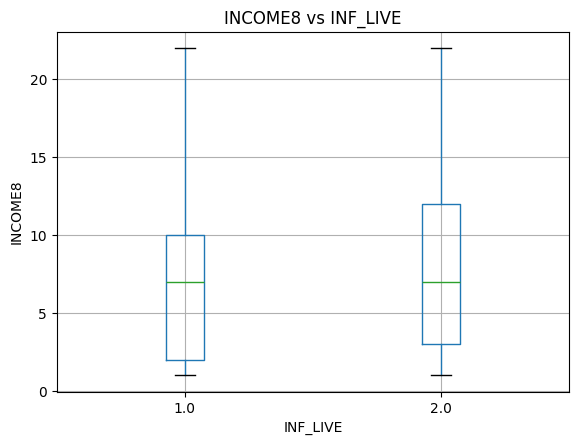

<Figure size 800x500 with 0 Axes>

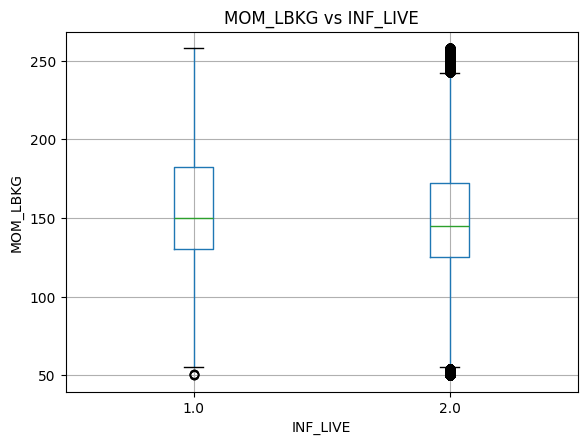

<Figure size 800x500 with 0 Axes>

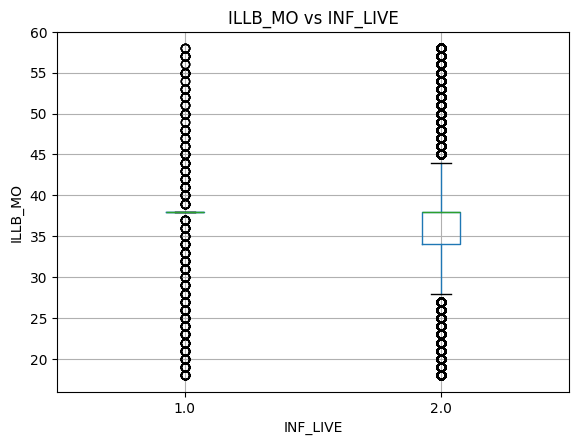

In [24]:
#EDA Plotting Numerical Variables
import pandas as pd
import matplotlib.pyplot as plt

csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
data = pd.read_csv(csvfile_path, low_memory=False)

numerical_vars = ["INCOME8", "MOM_LBKG", "ILLB_MO", ]
target_var = "INF_LIVE"

# Plot numerical variables against INF_LIVE 
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=var, by=target_var)
    plt.title(f'{var} vs {target_var}')
    plt.suptitle("") 
    plt.xlabel(target_var)
    plt.ylabel(var)
    plt.show()


C:\Users\kentv\AppData\Local\Temp\ipykernel_18236\1663546026.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


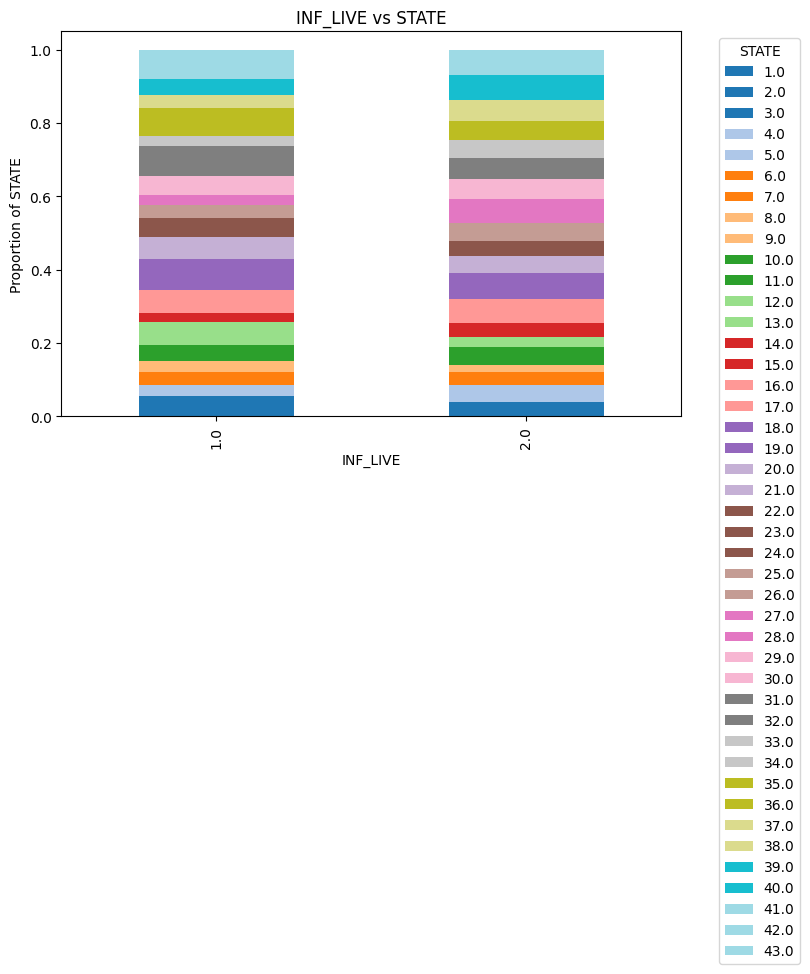

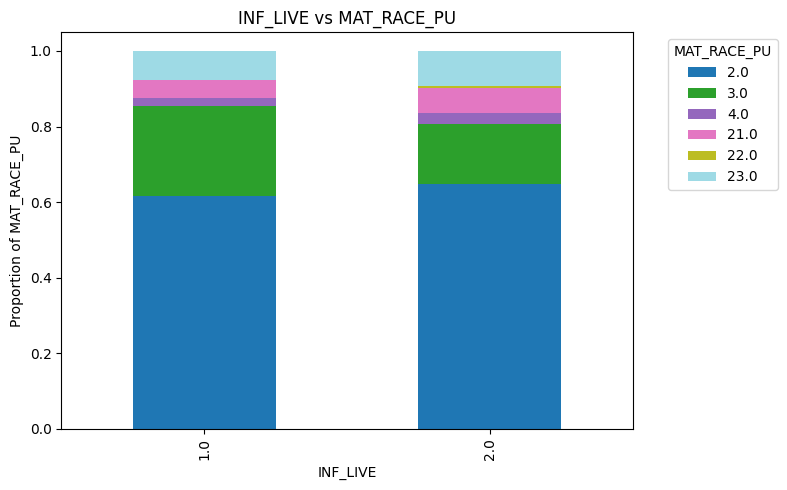

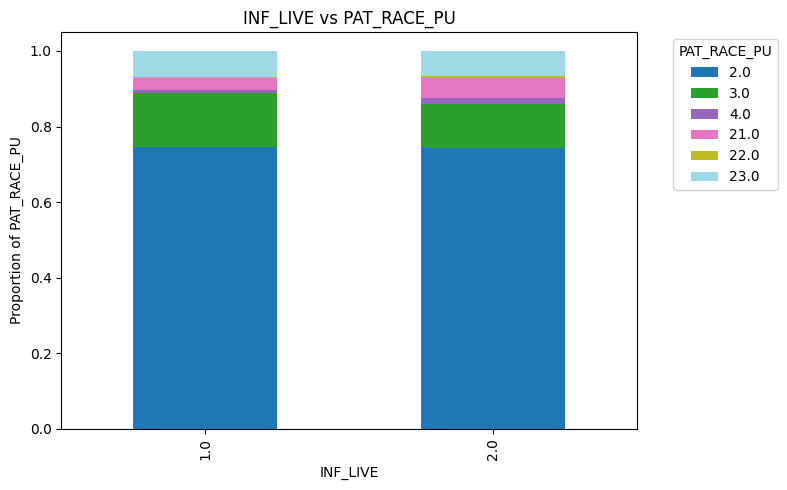

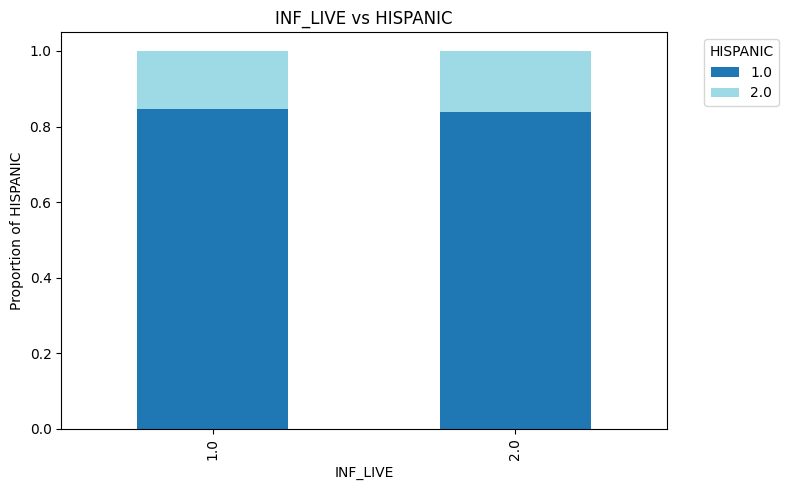

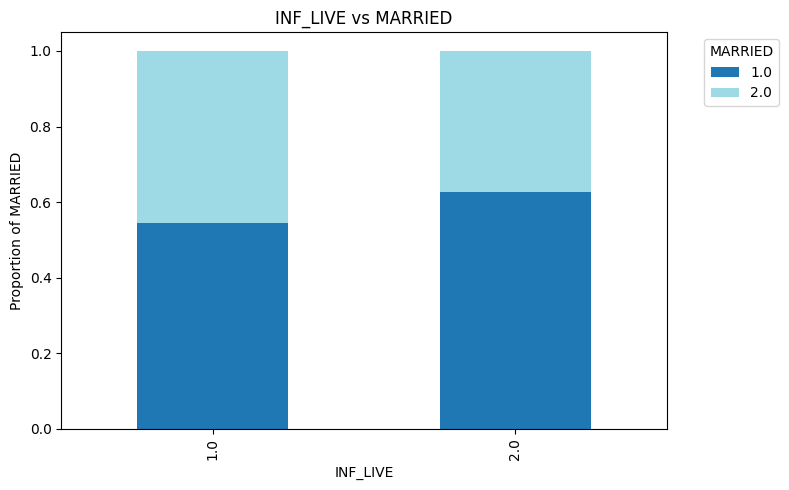

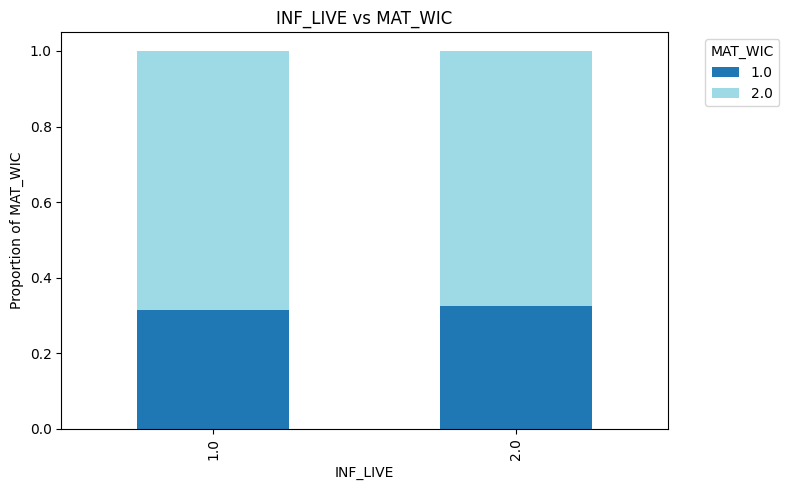

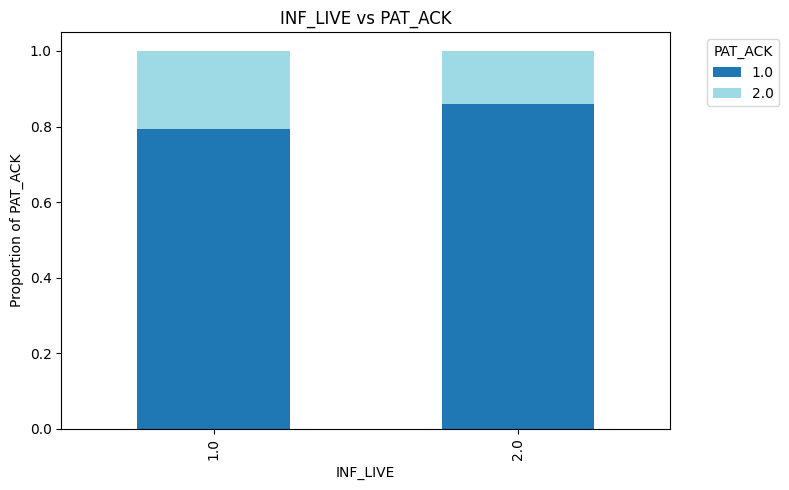

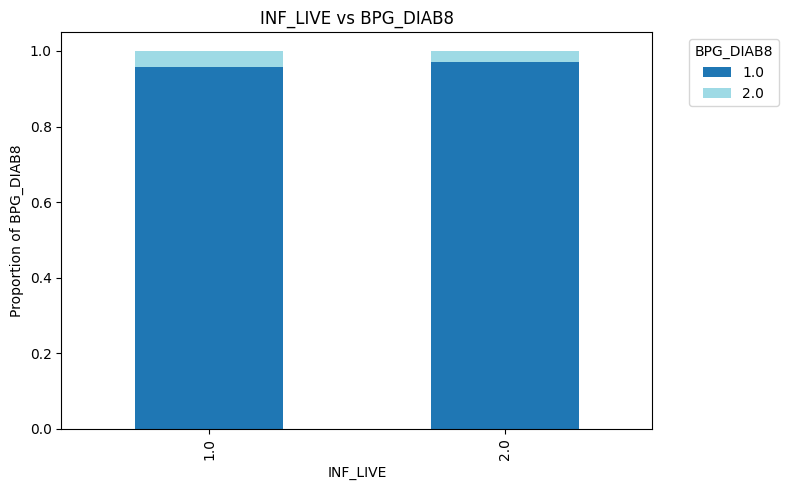

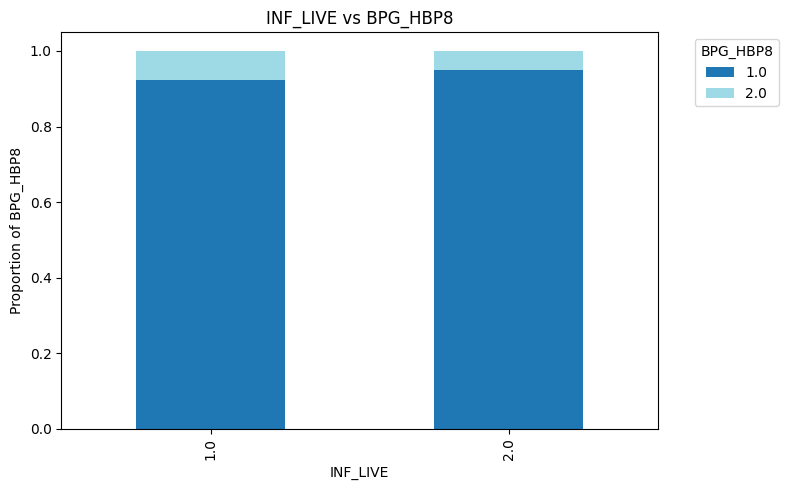

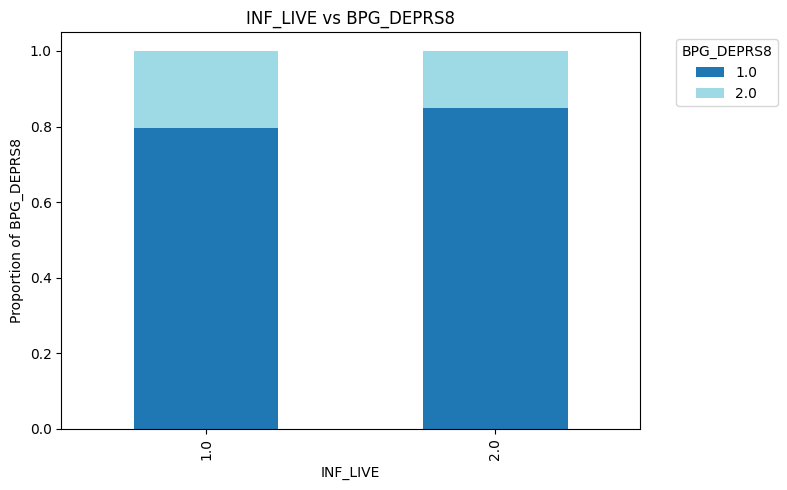

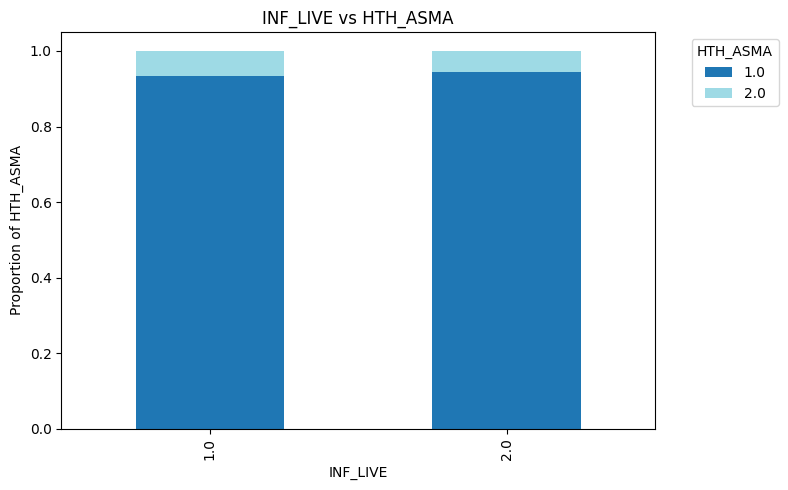

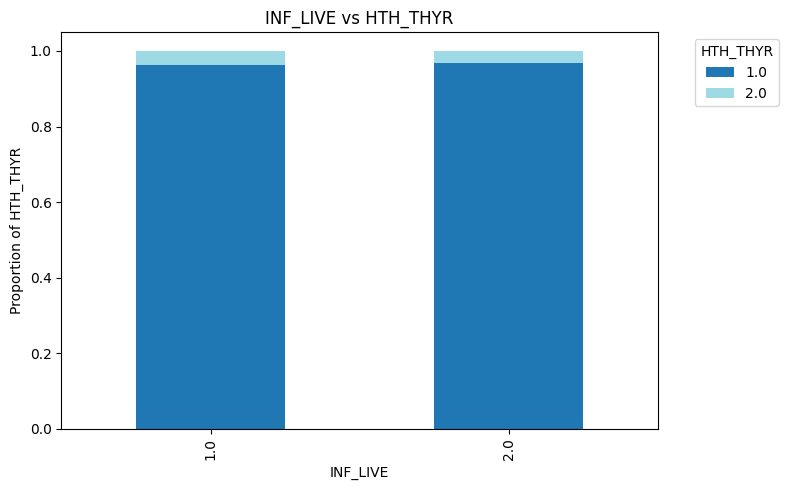

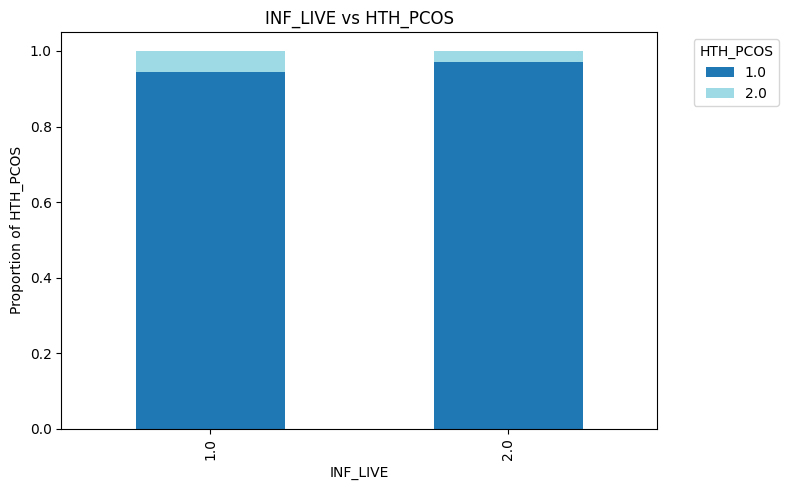

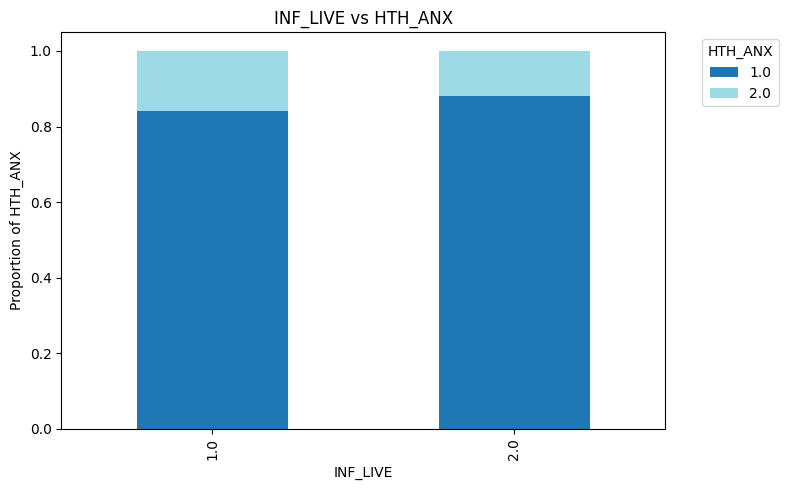

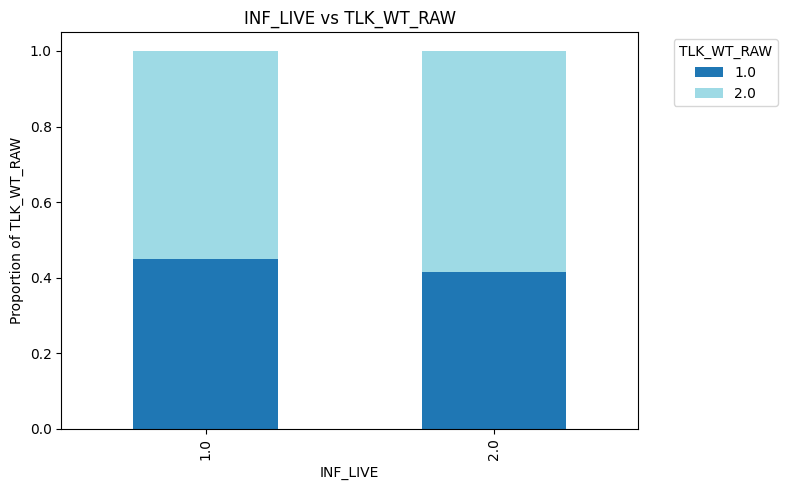

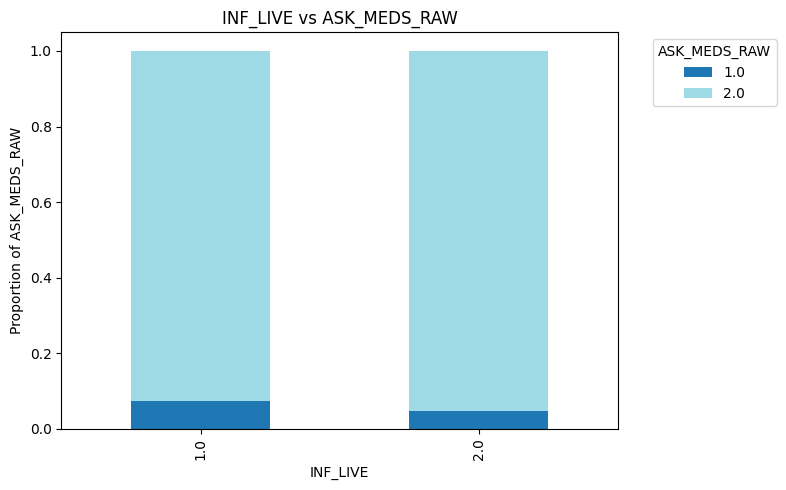

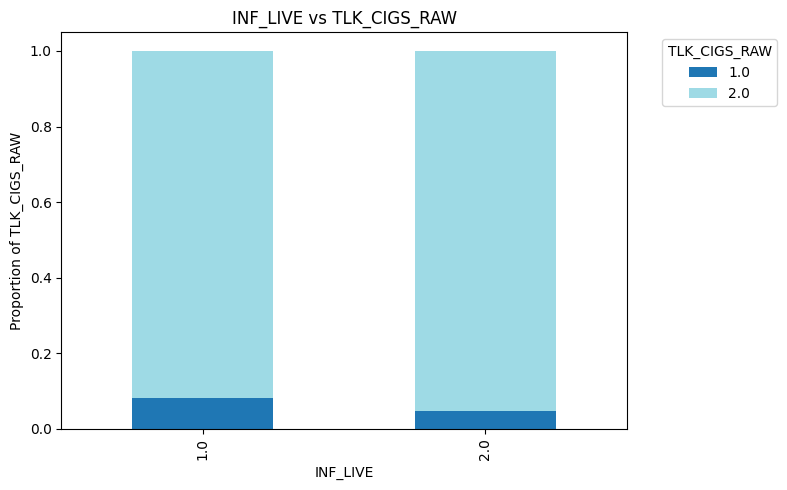

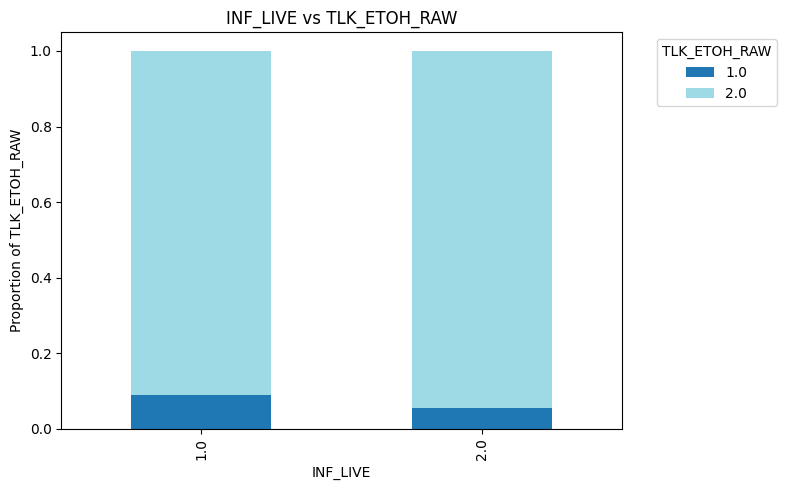

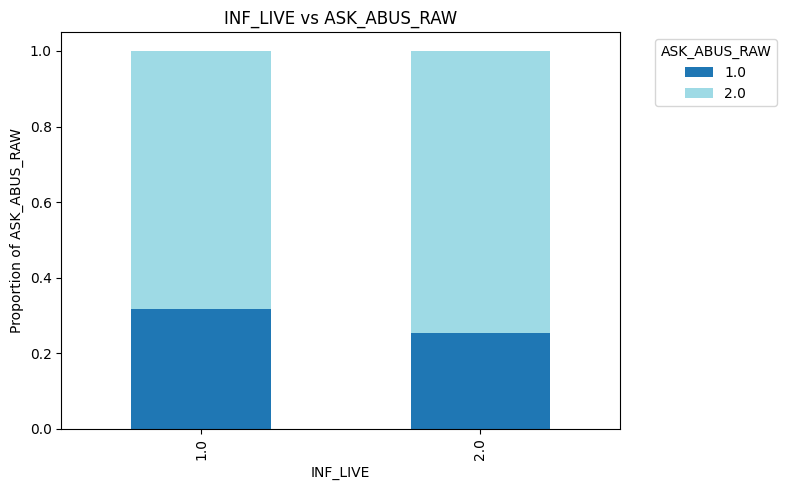

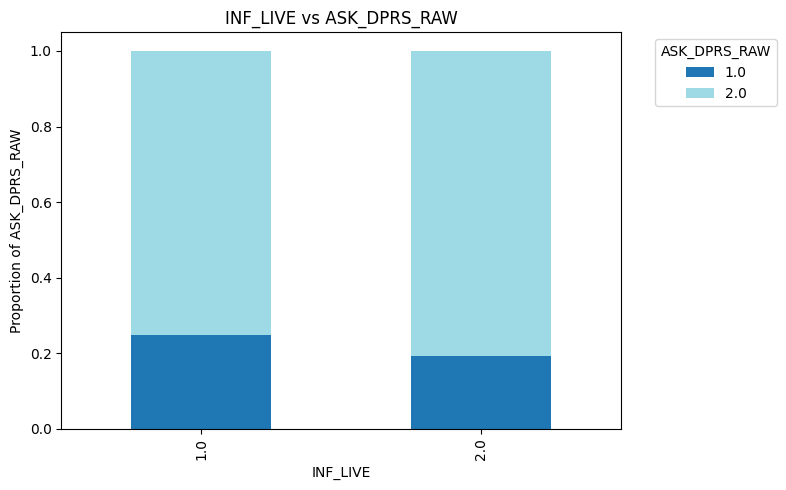

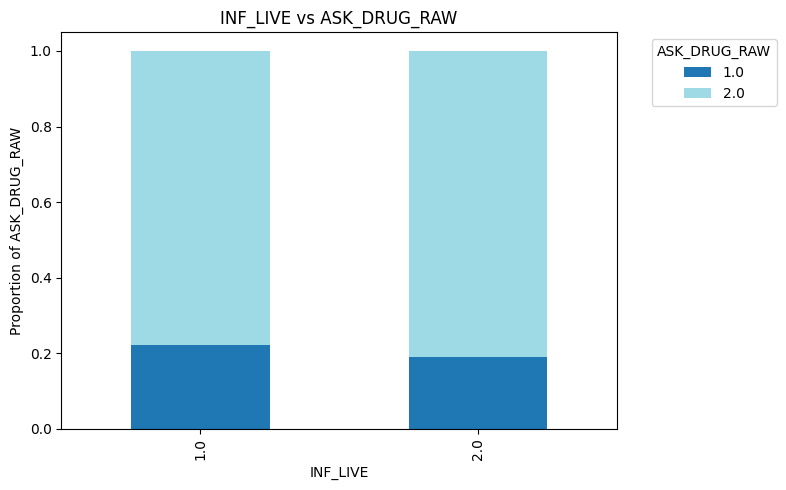

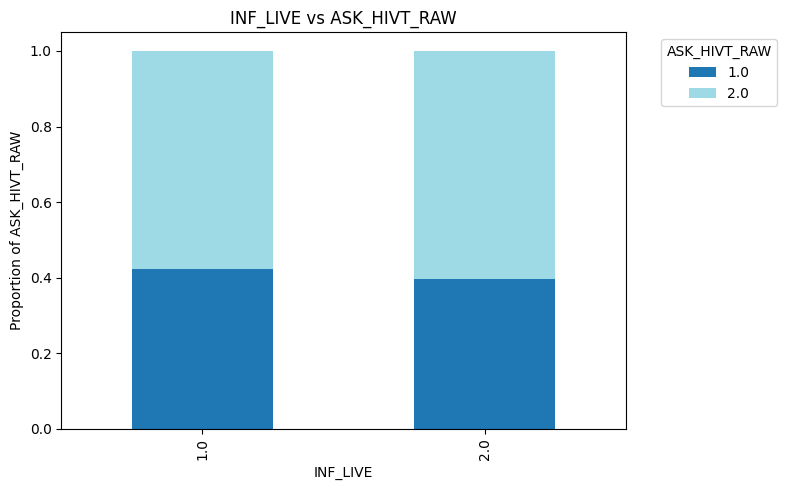

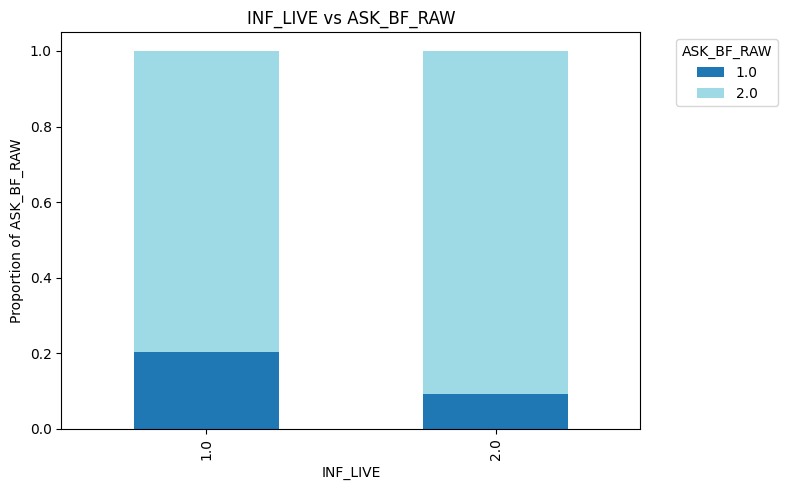

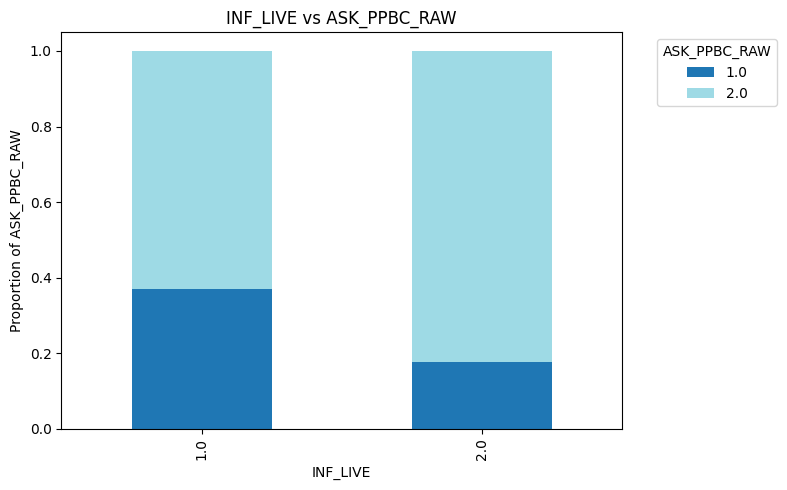

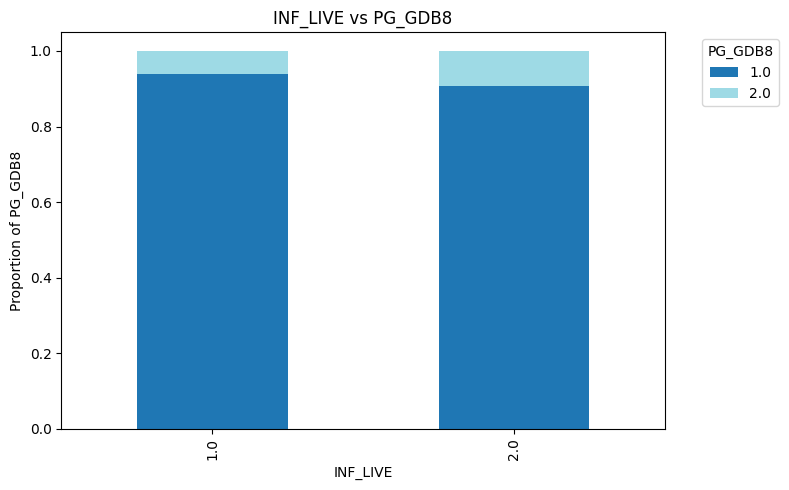

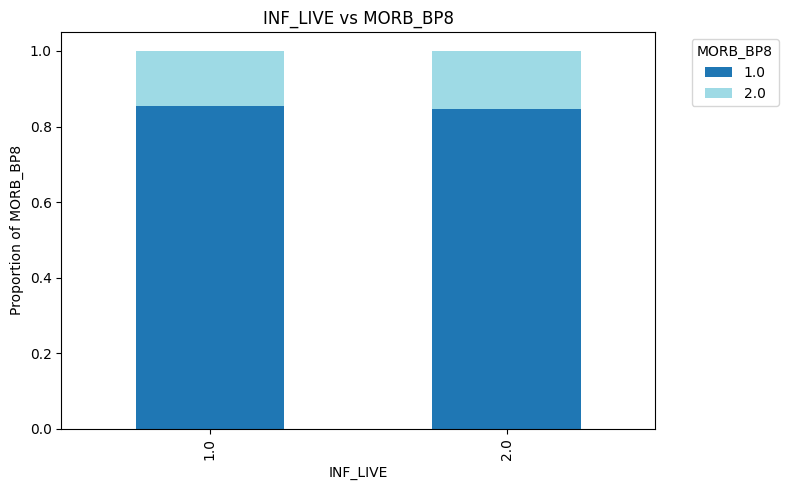

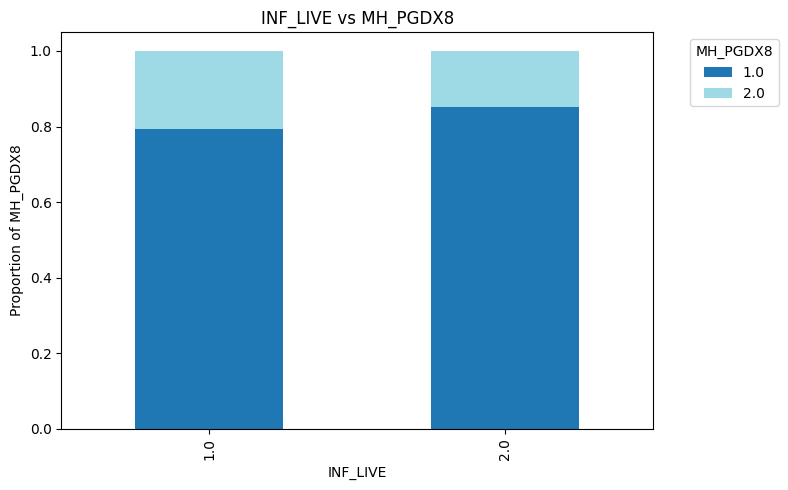

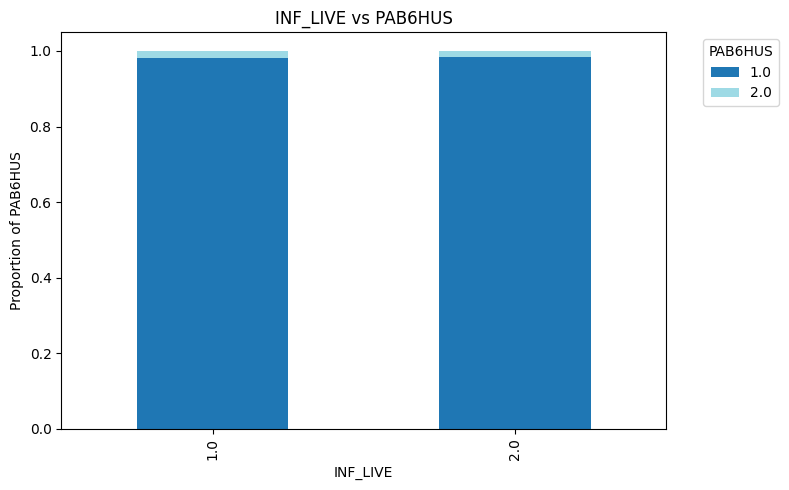

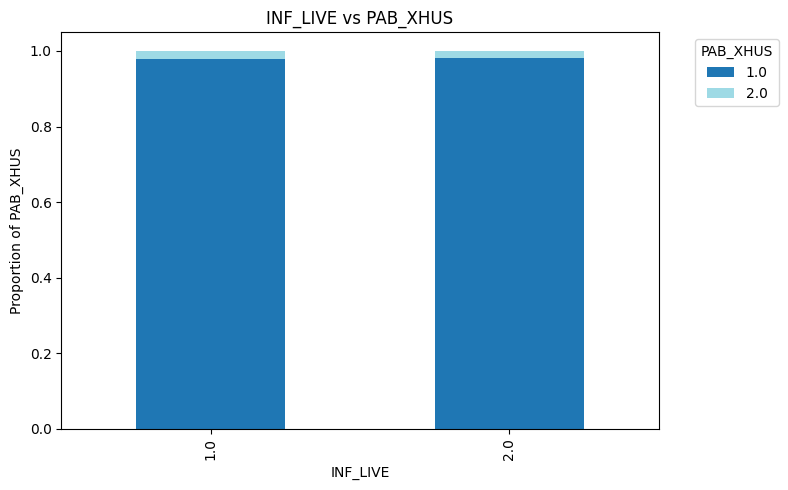

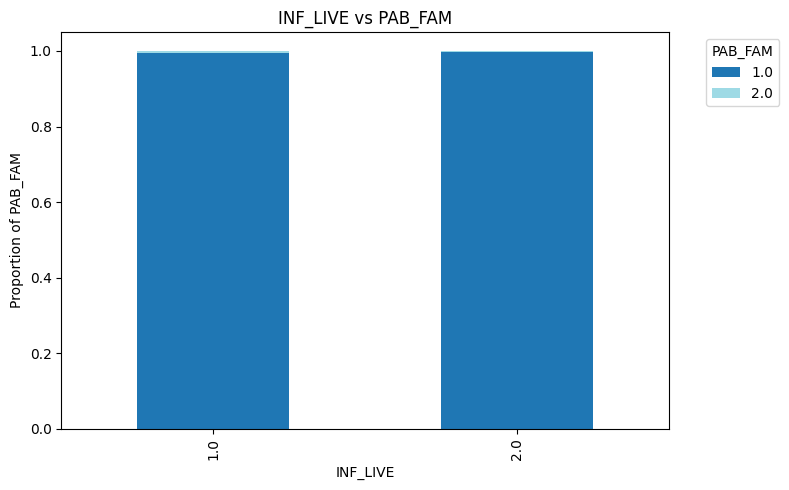

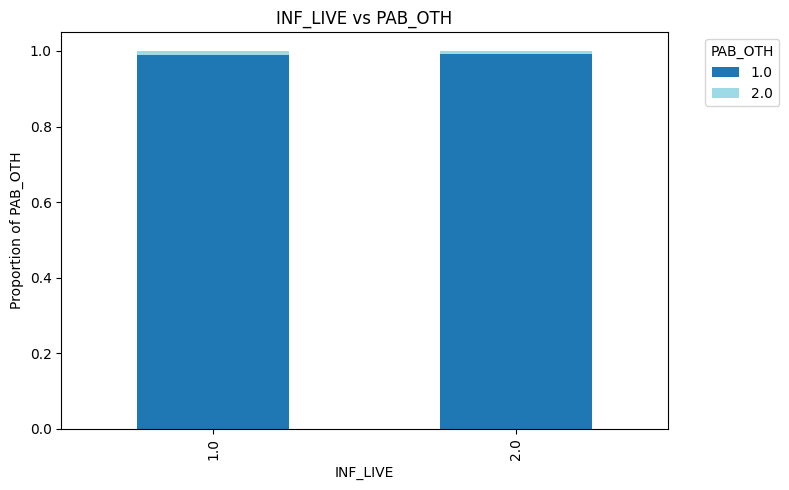

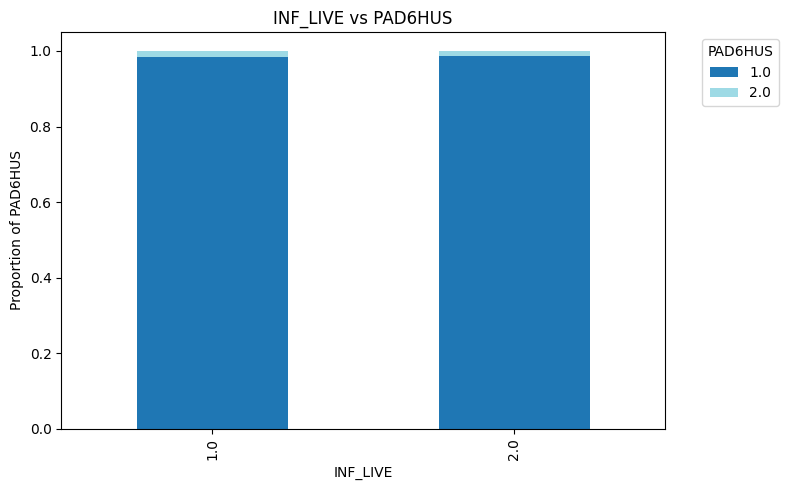

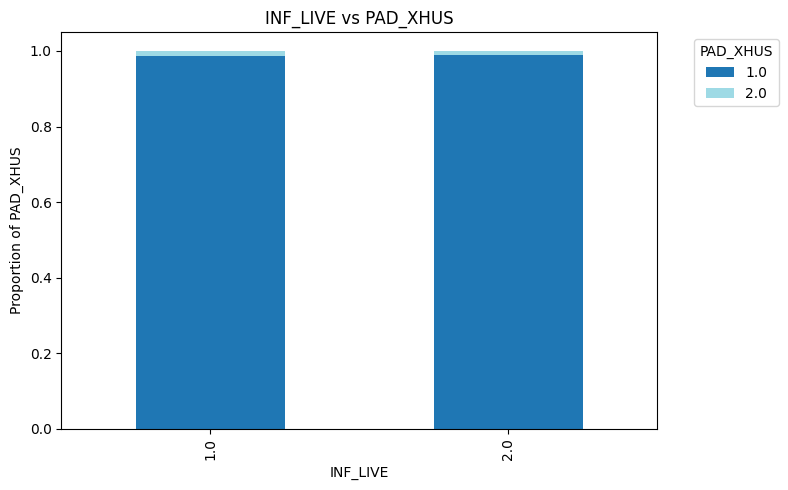

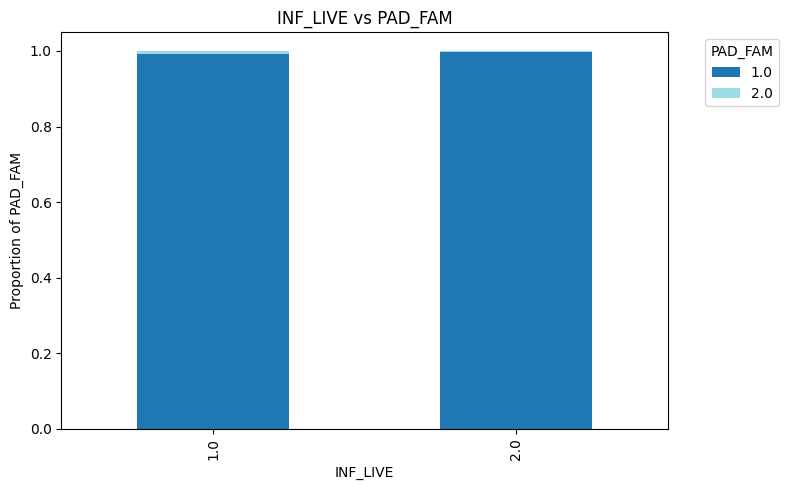

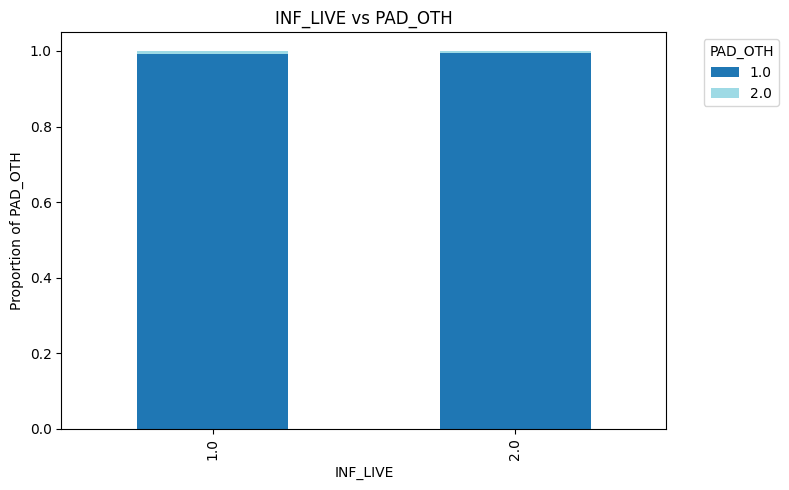

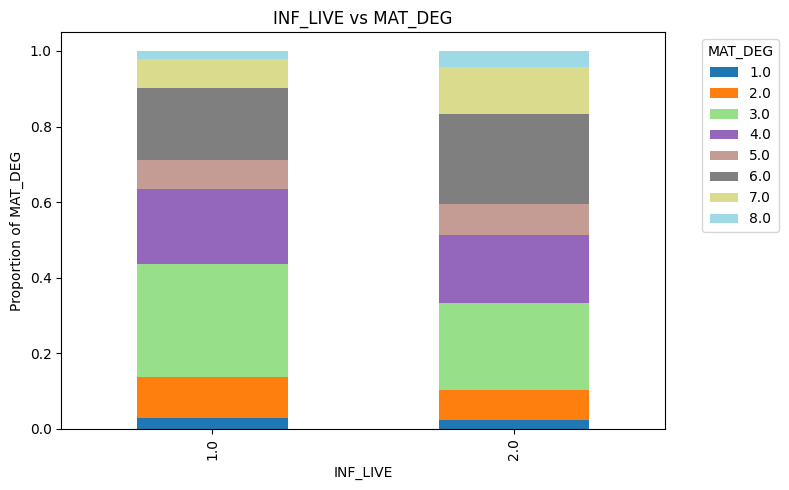

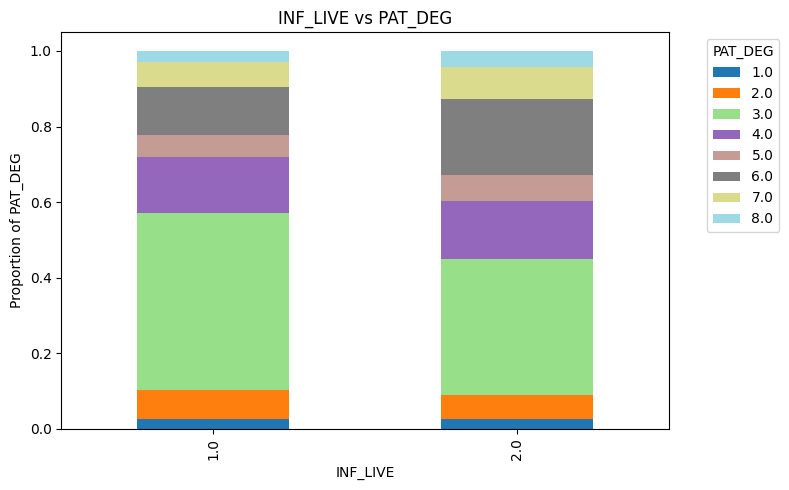

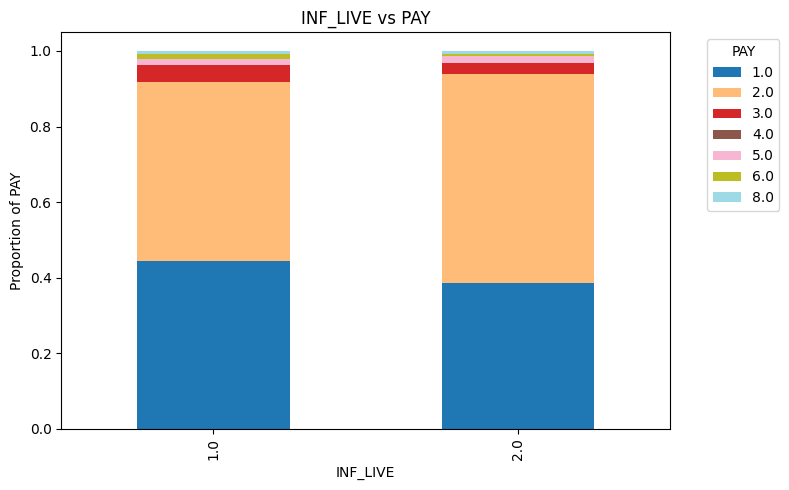

In [25]:
#EDA Plotting Categorical Variables 
import pandas as pd
import matplotlib.pyplot as plt

csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
data = pd.read_csv(csvfile_path, low_memory=False)

categorical_vars = [
#categorical (Everything is Yes/No) except State, MAT_RACE_PU, PAT_RACE_PU 
     #demographics
    "STATE","MAT_RACE_PU", "PAT_RACE_PU", "HISPANIC", "MARRIED", "MAT_WIC", "PAT_ACK", 
    #health problem,
    "BPG_DIAB8", "BPG_HBP8", "BPG_DEPRS8", "HTH_ASMA","HTH_THYR","HTH_PCOS", "HTH_ANX",
    #questionare 
    "TLK_WT_RAW","ASK_MEDS_RAW", "TLK_CIGS_RAW", "TLK_ETOH_RAW", "ASK_ABUS_RAW", "ASK_DPRS_RAW", "ASK_DRUG_RAW", "ASK_HIVT_RAW", "ASK_BF_RAW", "ASK_PPBC_RAW",
    #health problem during pregnancy
    "PG_GDB8", "MORB_BP8", "MH_PGDX8",
    #abuse during and before pregnancy
    "PAB6HUS", "PAB_XHUS", "PAB_FAM", "PAB_OTH", "PAD6HUS", "PAD_XHUS", "PAD_FAM", "PAD_OTH",
    #ordinal demographics
    "MAT_DEG", "PAT_DEG", "PAY"
]
target_var = "INF_LIVE"

# Plot each categorical variable against INF_LIVE
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    
    ct = pd.crosstab(data[target_var], data[var], normalize='index')
    
    # Plot a stacked bar chart
    ct.plot(kind='bar', stacked=True, ax=plt.gca(), colormap="tab20")
    plt.xlabel(target_var)
    plt.ylabel(f'Proportion of {var}')
    plt.title(f'{target_var} vs {var}')
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [26]:
#Correlation Between Variable of Interest and Target 
import pandas as pd
from scipy.stats import pointbiserialr, chi2_contingency
import numpy as np

csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
data = pd.read_csv(csvfile_path, low_memory=False)

numerical_vars = ["MOM_LBKG", "ILLB_MO", "INCOME8"]
categorical_vars = [
    "STATE","MAT_RACE_PU", "PAT_RACE_PU", "HISPANIC", "MARRIED", "MAT_WIC", "PAT_ACK", 
    "BPG_DIAB8", "BPG_HBP8", "BPG_DEPRS8", "HTH_ASMA","HTH_THYR","HTH_PCOS", "HTH_ANX",
    "TLK_WT_RAW","ASK_MEDS_RAW", "TLK_CIGS_RAW", "TLK_ETOH_RAW", "ASK_ABUS_RAW", "ASK_DPRS_RAW", "ASK_DRUG_RAW", "ASK_HIVT_RAW", "ASK_BF_RAW", "ASK_PPBC_RAW",
    "PG_GDB8", "MORB_BP8", "MH_PGDX8",
    "PAB6HUS", "PAB_XHUS", "PAB_FAM", "PAB_OTH", "PAD6HUS", "PAD_XHUS", "PAD_FAM", "PAD_OTH",
    "MAT_DEG", "PAT_DEG", "PAY"
]
target_var = "INF_LIVE"

# Point Biserial Correlation for binary (INF_LIVE) and numerical variables
print("Point Biserial Correlation (Numerical vs Target Variable):")
for var in numerical_vars:
    # Fill NaN values with the mode for each variable
    filled_var = data[var].fillna(data[var].mode()[0])
    corr, p_value = pointbiserialr(data[target_var], filled_var)
    print(f"{var} - Correlation: {corr:.3f}, p-value: {p_value:.3f}")

# Chi-square test for categorical variables
print("\nChi-Square Test (Categorical vs Target Variable):")
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var].fillna(data[var].mode()[0]), data[target_var])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{var} - Chi2: {chi2:.3f}, p-value: {p:.3f}")

# Pearson Correlation for numerical variables (including INF_LIVE as binary for correlation matrix)
print("\nPearson Correlation Matrix (Including INF_LIVE and Numerical Variables):")
data[target_var] = data[target_var].astype(int)  # Ensure INF_LIVE is numeric for correlation matrix
correlation_matrix = data[[target_var] + numerical_vars].corr(method="pearson")
print(correlation_matrix)

Point Biserial Correlation (Numerical vs Target Variable):
MOM_LBKG - Correlation: -0.017, p-value: 0.000
ILLB_MO - Correlation: -0.001, p-value: 0.783
INCOME8 - Correlation: 0.020, p-value: 0.000

Chi-Square Test (Categorical vs Target Variable):
STATE - Chi2: 451.690, p-value: 0.000
MAT_RACE_PU - Chi2: 74.264, p-value: 0.000
PAT_RACE_PU - Chi2: 25.417, p-value: 0.000
HISPANIC - Chi2: 0.583, p-value: 0.445
MARRIED - Chi2: 39.398, p-value: 0.000
MAT_WIC - Chi2: 0.743, p-value: 0.389
PAT_ACK - Chi2: 49.634, p-value: 0.000
BPG_DIAB8 - Chi2: 5.597, p-value: 0.018
BPG_HBP8 - Chi2: 16.678, p-value: 0.000
BPG_DEPRS8 - Chi2: 28.162, p-value: 0.000
HTH_ASMA - Chi2: 2.996, p-value: 0.083
HTH_THYR - Chi2: 0.984, p-value: 0.321
HTH_PCOS - Chi2: 32.481, p-value: 0.000
HTH_ANX - Chi2: 21.403, p-value: 0.000
TLK_WT_RAW - Chi2: 6.757, p-value: 0.009
ASK_MEDS_RAW - Chi2: 23.464, p-value: 0.000
TLK_CIGS_RAW - Chi2: 31.430, p-value: 0.000
TLK_ETOH_RAW - Chi2: 31.166, p-value: 0.000
ASK_ABUS_RAW - Chi2: 

In [7]:
#Correlation Between Variable of Interest and Target v2 (Check Later)
import pandas as pd
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr
import numpy as np

# Load data
csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
data = pd.read_csv(csvfile_path)

# Define variables by type
binary_categorical_vars = [
    "HISPANIC", "MARRIED", "MAT_WIC", "PAT_ACK", "BPG_DIAB8", "BPG_HBP8", "BPG_DEPRS8",
    "HTH_ASMA", "HTH_THYR", "HTH_PCOS", "HTH_ANX", "TLK_WT_RAW", "ASK_MEDS_RAW",
    "TLK_CIGS_RAW", "TLK_ETOH_RAW", "ASK_ABUS_RAW", "ASK_DPRS_RAW", "ASK_DRUG_RAW",
    "ASK_HIVT_RAW", "ASK_BF_RAW", "ASK_PPBC_RAW", "PG_GDB8", "MORB_BP8", "MH_PGDX8",
    "PAB6HUS", "PAB_XHUS", "PAB_FAM", "PAB_OTH", "PAD6HUS", "PAD_XHUS", "PAD_FAM", "PAD_OTH"
]

ordinal_categorical_vars = ["INCOME8", "MAT_DEG", "PAT_DEG", "PAY"]
regular_categorical_vars = ["STATE", "MAT_RACE_PU", "PAT_RACE_PU"]
numerical_vars = ["INCOME8", "MOM_LBKG", "ILLB_MO"]
target_var = "INF_LIVE"

# Ensure target variable is numeric for calculations
data[target_var] = data[target_var].astype(int)

# Point Biserial Correlation for binary target and numerical variables
print("Point Biserial Correlation (Numerical vs Target Variable):")
for var in numerical_vars:
    if var != target_var:  # Exclude target from itself
        # Fill NaN values with the mode for each variable
        filled_var = data[var].fillna(data[var].mode()[0])
        corr, p_value = pointbiserialr(data[target_var], filled_var)
        print(f"{var} - Correlation: {corr:.3f}, p-value: {p_value:.3f}")

# Chi-square test for binary categorical and regular categorical variables
print("\nChi-Square Test (Binary Categorical vs Target Variable):")
for var in binary_categorical_vars:
    contingency_table = pd.crosstab(data[var].fillna(data[var].mode()[0]), data[target_var])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{var} - Chi2: {chi2:.3f}, p-value: {p:.3f}")

print("\nChi-Square Test (Regular Categorical vs Target Variable):")
for var in regular_categorical_vars:
    contingency_table = pd.crosstab(data[var].fillna(data[var].mode()[0]), data[target_var])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{var} - Chi2: {chi2:.3f}, p-value: {p:.3f}")

# Spearman Correlation for ordinal categorical variables
print("\nSpearman Correlation (Ordinal Categorical vs Target Variable):")
for var in ordinal_categorical_vars:
    # Fill NaN values with mode, then calculate Spearman correlation
    filled_var = data[var].fillna(data[var].mode()[0])
    corr, p_value = spearmanr(data[target_var], filled_var)
    print(f"{var} - Spearman Correlation: {corr:.3f}, p-value: {p_value:.3f}")

# Pearson Correlation Matrix (Numerical variables only)
print("\nPearson Correlation Matrix (Numerical Variables Only):")
numerical_data = data[[target_var] + numerical_vars].fillna(data.mode().iloc[0])  # Fill NaNs with mode for matrix
correlation_matrix = numerical_data.corr(method="pearson")
print(correlation_matrix)


Point Biserial Correlation (Numerical vs Target Variable):
INCOME8 - Correlation: 0.002, p-value: 0.303
MOM_LBKG - Correlation: -0.016, p-value: 0.000
ILLB_MO - Correlation: 0.007, p-value: 0.000

Chi-Square Test (Binary Categorical vs Target Variable):
HISPANIC - Chi2: 3.073, p-value: 0.080
MARRIED - Chi2: 45.142, p-value: 0.000
MAT_WIC - Chi2: 1.940, p-value: 0.164
PAT_ACK - Chi2: 74.984, p-value: 0.000
BPG_DIAB8 - Chi2: 18.653, p-value: 0.000
BPG_HBP8 - Chi2: 41.813, p-value: 0.000
BPG_DEPRS8 - Chi2: 34.531, p-value: 0.000
HTH_ASMA - Chi2: 6.350, p-value: 0.012
HTH_THYR - Chi2: 2.382, p-value: 0.123
HTH_PCOS - Chi2: 37.859, p-value: 0.000
HTH_ANX - Chi2: 42.933, p-value: 0.000
TLK_WT_RAW - Chi2: 3.875, p-value: 0.049
ASK_MEDS_RAW - Chi2: 43.928, p-value: 0.000
TLK_CIGS_RAW - Chi2: 60.929, p-value: 0.000
TLK_ETOH_RAW - Chi2: 62.948, p-value: 0.000
ASK_ABUS_RAW - Chi2: 28.227, p-value: 0.000
ASK_DPRS_RAW - Chi2: 31.669, p-value: 0.000
ASK_DRUG_RAW - Chi2: 16.225, p-value: 0.000
ASK_HI

In [17]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2_contingency
import numpy as np
import itertools

# Load data
csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
data = pd.read_csv(csvfile_path)

# Define variable groups
binary_categorical_vars = [
    "HISPANIC", "MARRIED", "MAT_WIC", "PAT_ACK", "BPG_DIAB8", "BPG_HBP8", "BPG_DEPRS8",
    "HTH_ASMA", "HTH_THYR", "HTH_PCOS", "HTH_ANX", "TLK_WT_RAW", "ASK_MEDS_RAW",
    "TLK_CIGS_RAW", "TLK_ETOH_RAW", "ASK_ABUS_RAW", "ASK_DPRS_RAW", "ASK_DRUG_RAW",
    "ASK_HIVT_RAW", "ASK_BF_RAW", "ASK_PPBC_RAW", "PG_GDB8", "MORB_BP8", "MH_PGDX8",
    "PAB6HUS", "PAB_XHUS", "PAB_FAM", "PAB_OTH", "PAD6HUS", "PAD_XHUS", "PAD_FAM", "PAD_OTH"
]

ordinal_categorical_vars = ["INCOME8", "MAT_DEG", "PAT_DEG", "PAY"]
regular_categorical_vars = ["STATE", "MAT_RACE_PU", "PAT_RACE_PU"]
numerical_vars = ["INCOME8", "MOM_LBKG", "ILLB_MO"]

# Pearson Correlation for Numerical vs. Numerical
print("Numerical Variable Correlations (Pearson):")
for var1, var2 in itertools.combinations(numerical_vars, 2):
    filled_var1 = data[var1].fillna(data[var1].mode()[0])
    filled_var2 = data[var2].fillna(data[var2].mode()[0])
    corr, p_value = pearsonr(filled_var1, filled_var2)
    print(f"{var1} and {var2} - Pearson Correlation: {corr:.5f}, p-value: {p_value:.5f}")

# Spearman Correlation for Ordinal Categorical vs. Ordinal Categorical
print("\nOrdinal Categorical Variable Correlations (Spearman):")
for var1, var2 in itertools.combinations(ordinal_categorical_vars, 2):
    filled_var1 = data[var1].fillna(data[var1].mode()[0])
    filled_var2 = data[var2].fillna(data[var2].mode()[0])
    corr, p_value = spearmanr(filled_var1, filled_var2)
    print(f"{var1} and {var2} - Spearman Correlation: {corr:.5f}, p-value: {p_value:.5f}")

# Chi-Square Test for Binary and Regular Categorical Variables
print("\nCategorical Variable Associations (Chi-Square Test):")
for var1, var2 in itertools.combinations(binary_categorical_vars + regular_categorical_vars, 2):
    filled_var1 = data[var1].fillna(data[var1].mode()[0])
    filled_var2 = data[var2].fillna(data[var2].mode()[0])
    contingency_table = pd.crosstab(filled_var1, filled_var2)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{var1} and {var2} - Chi-Square: {chi2:.5f}, p-value: {p_value:.5f}")


Numerical Variable Correlations (Pearson):
INCOME8 and MOM_LBKG - Pearson Correlation: -0.03053, p-value: 0.00000
INCOME8 and ILLB_MO - Pearson Correlation: -0.00610, p-value: 0.00258
MOM_LBKG and ILLB_MO - Pearson Correlation: 0.06954, p-value: 0.00000

Ordinal Categorical Variable Correlations (Spearman):
INCOME8 and MAT_DEG - Spearman Correlation: 0.45040, p-value: 0.00000
INCOME8 and PAT_DEG - Spearman Correlation: 0.43015, p-value: 0.00000
INCOME8 and PAY - Spearman Correlation: 0.43328, p-value: 0.00000
MAT_DEG and PAT_DEG - Spearman Correlation: 0.68074, p-value: 0.00000
MAT_DEG and PAY - Spearman Correlation: 0.44611, p-value: 0.00000
PAT_DEG and PAY - Spearman Correlation: 0.41820, p-value: 0.00000

Categorical Variable Associations (Chi-Square Test):
HISPANIC and MARRIED - Chi-Square: 3339.79470, p-value: 0.00000
HISPANIC and MAT_WIC - Chi-Square: 9383.51573, p-value: 0.00000
HISPANIC and PAT_ACK - Chi-Square: 184.51069, p-value: 0.00000
HISPANIC and BPG_DIAB8 - Chi-Square: 0

In [27]:
#Class Imbalance
import pandas as pd

csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/rawPhase8ARF.csv'

rawPhase8ARF = pd.read_csv(csvfile_path)

target_variables = ["INF_LIVE"]

# Function to calculate the count and percentage of each group
def calculate_distribution(df, column):
    count_table = df[column].value_counts(dropna=False)
    percentage_table = df[column].value_counts(normalize=True, dropna=False) * 100
    distribution_table = pd.DataFrame({'Count': count_table, 'Percentage': percentage_table})
    return distribution_table

# Display the distribution of each target variable
for target in target_variables:
    print(f'\nDistribution for {target}:\n')
    print(calculate_distribution(rawPhase8ARF, target))


C:\Users\kentv\AppData\Local\Temp\ipykernel_18236\1544193342.py:6: DtypeWarning: Columns (459,462,463,464,465,466) have mixed types. Specify dtype option on import or set low_memory=False.
  rawPhase8ARF = pd.read_csv(csvfile_path)



Distribution for INF_LIVE:

           Count  Percentage
INF_LIVE                    
2.0       242062   96.836420
NaN         5756    2.302676
1.0         2152    0.860903


In [29]:
# Split Test and Training and Apply SMOTE Only
import pandas as pd 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

csvfile_path = 'C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv1.csv'
data = pd.read_csv(csvfile_path)

# Define features and target variable, excluding ID from features
X = data.drop(columns=["INF_LIVE", "ID"])
y = data["INF_LIVE"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Output the initial class distribution
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to oversample the minority class to match the majority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Output the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_smote.value_counts())

# Create a DataFrame for the balanced data
balanced_data = pd.DataFrame(X_smote, columns=X.columns)
balanced_data['INF_LIVE'] = y_smote.values

# Save the balanced data to a new CSV file
output_file_path = "C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv"
balanced_data.to_csv(output_file_path, index=False)

print(f"\nBalanced dataset saved to {output_file_path}")


Class distribution before SMOTE:
INF_LIVE
2.0    118076
1.0       977
Name: count, dtype: int64

Class distribution after SMOTE:
INF_LIVE
2.0    118076
1.0    118076
Name: count, dtype: int64

Balanced dataset saved to C:/Users/kentv/Desktop/ML/ML Proj - PRAM/Data/raw/cleanPhase8ARFv2.csv
